In [1]:
%matplotlib inline

## Test augmentations

In [23]:
import ssd.transforms.transforms as tr

In [50]:
import importlib
importlib.reload(tr)

<module 'ssd.transforms.transforms' from '/home/maggie/Dokumente/Diplomarbeit/source_code/ioi_thesis/bounding_box/ssd/transforms/transforms.py'>

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import cv2
import numpy as np

In [26]:
def show_frames(frame, bbox, ax):
    """Show image with landmarks"""
    if frame.ndim == 3:
        if frame.shape[2] == 1:
            frame = np.squeeze(frame)
            
    ax.imshow(frame, cmap='gray', vmin=0, vmax=8191)
    # xy, width, height with xy lower left
    coord = (bbox[0],bbox[1])
    width = bbox[2]-bbox[0]
    height = bbox[3]-bbox[1]
    rect = patches.Rectangle(coord,width,height,linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

Use fixed images for test of transformations

In [27]:
org_images = ["/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p020_s2/stimulation/p020_s2_t114.tif",
"/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p020_s7/stimulation/p020_s7_t123.tif",
"/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p051_s5/stimulation/t00141.tif",
"/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p074_s4/stimulation/t00148.tif",
"/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p101_s3/stimulation/t00115.tif",
"/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p062_s15/after/t00171.tif",
"/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p054_s2/before/t00007.tif",
"/home/maggie/Dokumente/Diplomarbeit/source_code/data/train/p047_s7/before/t00111.tif"]

In [28]:
def get_boxes():
    return [[452,266,461,299],[397,175,500,183],[369,217,393,266],[244,323,250,386],[403,381,462,382],[0,0,692,520],[0,0,692,520],[0,0,692,520]]

In [29]:
def read_sample(file):
    image = cv2.imread(file, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    h,w = image.shape
    return np.copy(image.reshape(h,w,1))

In [30]:
def plot(images, bboxes):
    fig, ax= plt.subplots(1, len(images), sharey=True)
    pos = 0
    for image,bbox in zip(images,bboxes):
        show_frames(image, bbox, ax[pos])
        pos += 1
    
    plt.show()

In [31]:
def plot_aug(images, bboxes, aug):
    for file,bbox in zip(images,bboxes):
        image = read_sample(file)
        aug_img = [image[:,:,0]]
        aug_box = [bbox]
        for t in aug:
            img, box = t(image,bbox)
            aug_img.append(img)
            aug_box.append(box)
        
        plot(aug_img, aug_box)
        

In [32]:
def plot_grid(images, bboxes):
    size = (1, len(images))
    pos = 0
    for image,bbox in zip(images, bboxes):
        print("shape: " + str(image.shape) + " " + str(bbox))
        ax= plt.subplot2grid(size, (0, pos))
        show_frames(image, bbox, ax)
        pos += 1
    
    plt.show()
    

In [33]:
def plot_aug_ratio(images, bboxes, aug):
    for file,bbox in zip(images,bboxes):
        image = read_sample(file)
        aug_img = [image[:,:,0]]
        aug_box = [bbox]
        for t in aug:
            img, box = t(image,bbox)
            aug_img.append(img)
            aug_box.append(box)
        
        plot_grid(aug_img, aug_box)

## Rotation

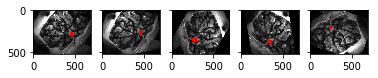

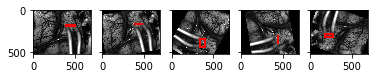

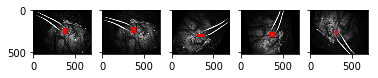

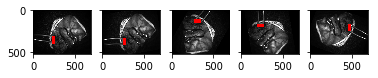

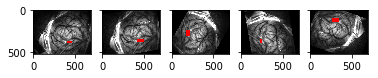

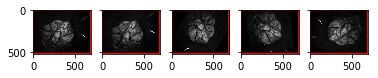

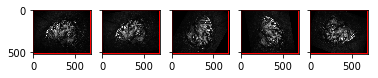

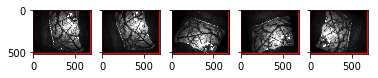

In [10]:
aug = [tr.Rotate(10), tr.Rotate(-120), tr.Rotate(280), tr.Rotate(-200)]
plot_aug(org_images, get_boxes(), aug)

## Fliping horizontally and vertically or both (randomly)

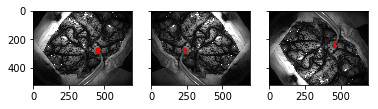

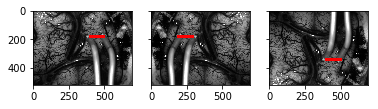

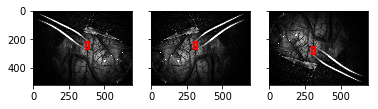

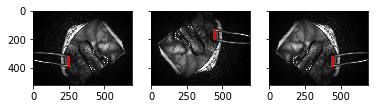

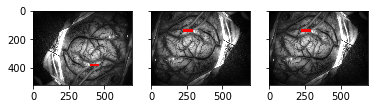

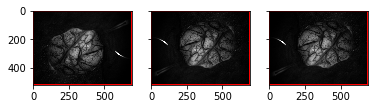

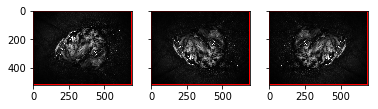

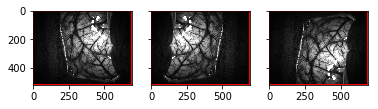

In [11]:
aug = [tr.RandomFlip(), tr.RandomFlip()]
plot_aug(org_images, get_boxes(), aug)

## RandomShift

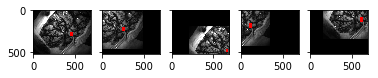

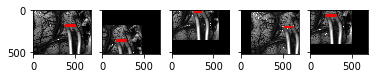

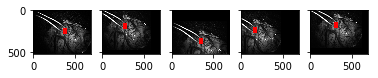

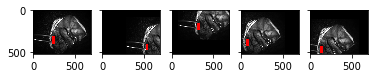

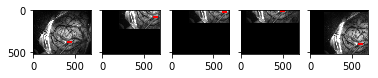

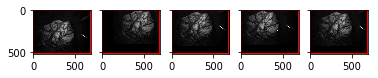

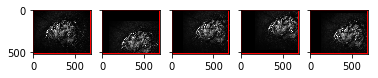

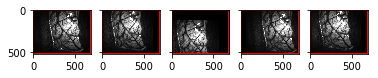

In [12]:
aug = [tr.RandomShift(), tr.RandomShift(), tr.RandomShift(),tr.RandomShift()]
plot_aug(org_images, get_boxes(), aug)

## Resizing

shape: (520, 692) [452, 266, 461, 299]
shape: (200, 500) [327, 102, 333, 115]
shape: (300, 399) [261, 153, 266, 172]


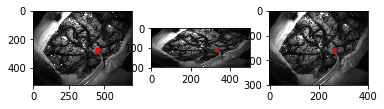

shape: (520, 692) [397, 175, 500, 183]
shape: (200, 500) [287, 67, 361, 70]
shape: (300, 399) [229, 101, 288, 106]


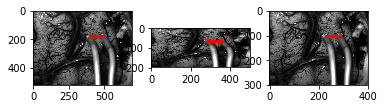

shape: (520, 692) [369, 217, 393, 266]
shape: (200, 500) [267, 83, 284, 102]
shape: (300, 399) [213, 125, 227, 153]


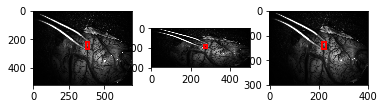

shape: (520, 692) [244, 323, 250, 386]
shape: (200, 500) [176, 124, 181, 148]
shape: (300, 399) [141, 186, 144, 223]


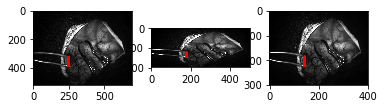

shape: (520, 692) [403, 381, 462, 382]
shape: (200, 500) [291, 147, 334, 147]
shape: (300, 399) [232, 220, 266, 220]


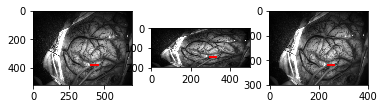

shape: (520, 692) [0, 0, 692, 520]
shape: (200, 500) [0, 0, 500, 200]
shape: (300, 399) [0, 0, 399, 300]


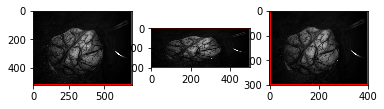

shape: (520, 692) [0, 0, 692, 520]
shape: (200, 500) [0, 0, 500, 200]
shape: (300, 399) [0, 0, 399, 300]


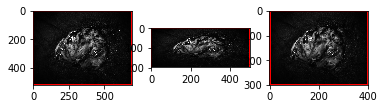

shape: (520, 692) [0, 0, 692, 520]
shape: (200, 500) [0, 0, 500, 200]
shape: (300, 399) [0, 0, 399, 300]


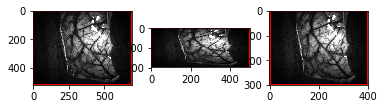

In [21]:
aug = [tr.Resize((200,500)),tr.Resize(300)]
plot_aug_ratio(org_images, get_boxes(), aug)

## RandomRescale

shape: (520, 692) [452, 266, 461, 299]
shape: (312, 415) [271, 160, 276, 179]
shape: (728, 969) [633, 372, 646, 419]


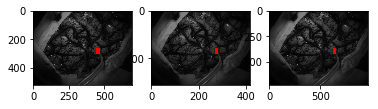

shape: (520, 692) [397, 175, 500, 183]
shape: (260, 346) [198, 88, 250, 92]
shape: (676, 900) [516, 228, 650, 238]


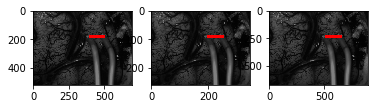

shape: (520, 692) [369, 217, 393, 266]
shape: (312, 415) [221, 130, 236, 160]
shape: (676, 900) [480, 282, 511, 346]


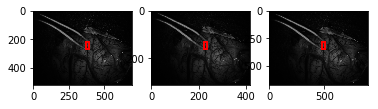

shape: (520, 692) [244, 323, 250, 386]
shape: (364, 484) [171, 226, 175, 270]
shape: (728, 969) [342, 452, 350, 540]


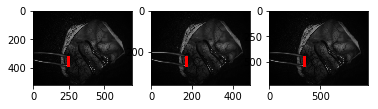

shape: (520, 692) [403, 381, 462, 382]
shape: (312, 415) [242, 229, 277, 229]
shape: (780, 1038) [604, 572, 693, 573]


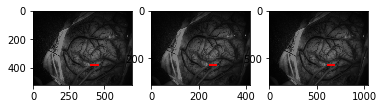

shape: (520, 692) [0, 0, 692, 520]
shape: (260, 346) [0, 0, 346, 260]
shape: (780, 1038) [0, 0, 1038, 780]


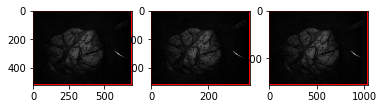

shape: (520, 692) [0, 0, 692, 520]
shape: (312, 415) [0, 0, 415, 312]
shape: (676, 900) [0, 0, 900, 676]


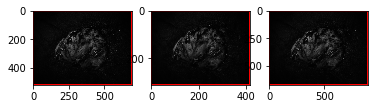

shape: (520, 692) [0, 0, 692, 520]
shape: (312, 415) [0, 0, 415, 312]
shape: (728, 969) [0, 0, 969, 728]


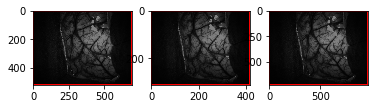

In [71]:
aug = [tr.RandomRescale((0.5,0.7)), tr.RandomRescale((1.3,1.5))]
plot_aug_ratio(org_images, get_boxes(), aug)

shape: (520, 692) [452, 266, 461, 299]
shape: (300, 300) [194, 133, 198, 150]
shape: (300, 300) [42, 2, 53, 42]


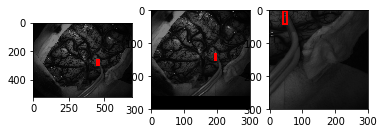

shape: (520, 692) [397, 175, 500, 183]
shape: (300, 300) [145, 95, 207, 100]
shape: (300, 300) [142, 65, 276, 75]


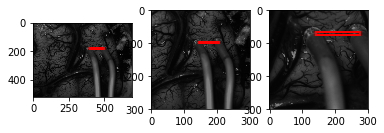

shape: (520, 692) [369, 217, 393, 266]
shape: (300, 300) [166, 108, 178, 133]
shape: (300, 300) [247, 170, 275, 229]


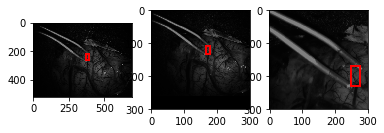

shape: (520, 692) [244, 323, 250, 386]
shape: (300, 300) [83, 192, 87, 236]
shape: (300, 300) [120, 96, 127, 171]


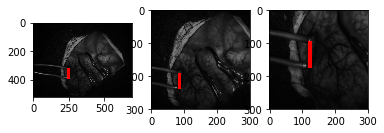

shape: (520, 692) [403, 381, 462, 382]
shape: (300, 300) [178, 219, 213, 219]
shape: (300, 300) [25, 213, 102, 215]


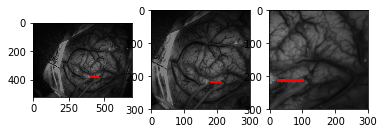

shape: (520, 692) [0, 0, 692, 520]
shape: (300, 300) [0, 0, 300, 300]
shape: (300, 300) [0, 0, 300, 300]


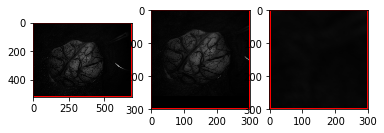

shape: (520, 692) [0, 0, 692, 520]
shape: (300, 300) [0, 0, 300, 300]
shape: (300, 300) [0, 0, 300, 300]


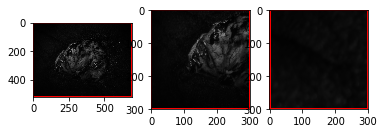

shape: (520, 692) [0, 0, 692, 520]
shape: (300, 300) [0, 0, 300, 300]
shape: (300, 300) [0, 0, 300, 300]


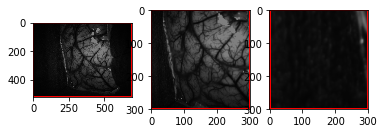

In [72]:
aug = [tr.Compose([tr.RandomRescale((0.5,0.7)), tr.RandomCrop(300)]), tr.Compose([tr.RandomRescale((1.1,1.3)),tr.RandomCrop(300)])]
plot_aug_ratio(org_images, get_boxes(), aug)

## Pad

shape: (520, 692) [452, 266, 461, 299]
shape: (620, 892) [452, 266, 461, 299]
shape: (620, 692) [452, 266, 461, 299]


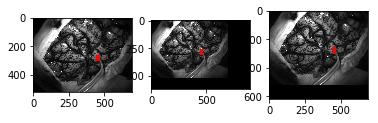

shape: (520, 692) [397, 175, 500, 183]
shape: (620, 892) [397, 175, 500, 183]
shape: (620, 692) [397, 175, 500, 183]


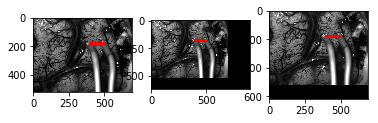

shape: (520, 692) [369, 217, 393, 266]
shape: (620, 892) [369, 217, 393, 266]
shape: (620, 692) [369, 217, 393, 266]


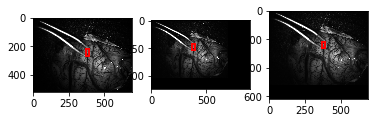

shape: (520, 692) [244, 323, 250, 386]
shape: (620, 892) [244, 323, 250, 386]
shape: (620, 692) [244, 323, 250, 386]


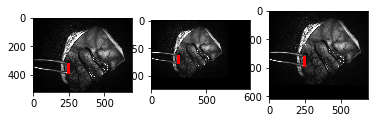

shape: (520, 692) [403, 381, 462, 382]
shape: (620, 892) [403, 381, 462, 382]
shape: (620, 692) [403, 381, 462, 382]


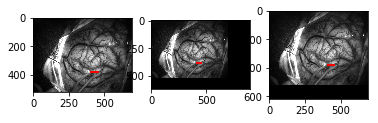

shape: (520, 692) [0, 0, 692, 520]
shape: (620, 892) [0, 0, 892, 620]
shape: (620, 692) [0, 0, 692, 620]


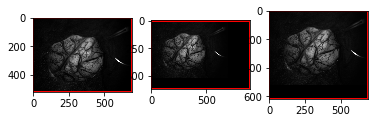

shape: (520, 692) [0, 0, 692, 520]
shape: (620, 892) [0, 0, 892, 620]
shape: (620, 692) [0, 0, 692, 620]


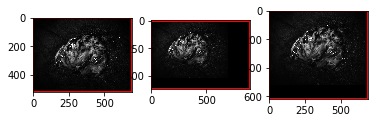

shape: (520, 692) [0, 0, 692, 520]
shape: (620, 892) [0, 0, 892, 620]
shape: (620, 692) [0, 0, 692, 620]


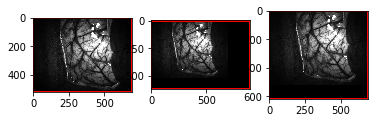

In [24]:
aug = [tr.Pad(100,200), tr.Pad(100,0)]
plot_aug_ratio(org_images, get_boxes(), aug)

## RandomCrop

shape: (520, 692) [452, 266, 461, 299]
shape: (100, 200) [86, 19, 95, 52]
shape: (412, 412) [206, 229, 215, 262]
shape: (150, 500) [432, 73, 441, 106]


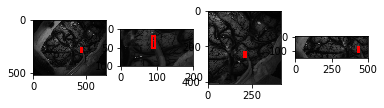

shape: (520, 692) [397, 175, 500, 183]
shape: (100, 200) [43, 76, 146, 84]
shape: (412, 412) [137, 87, 240, 95]
shape: (150, 500) [257, 83, 360, 91]


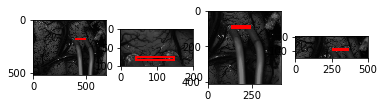

shape: (520, 692) [369, 217, 393, 266]
shape: (100, 200) [29, 21, 53, 70]
shape: (412, 412) [327, 141, 351, 190]
shape: (150, 500) [252, 34, 276, 83]


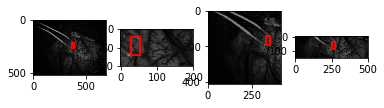

shape: (520, 692) [244, 323, 250, 386]
shape: (100, 200) [130, 14, 136, 77]
shape: (412, 412) [228, 310, 234, 373]
shape: (150, 500) [121, 73, 127, 136]


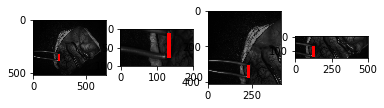

shape: (520, 692) [403, 381, 462, 382]
shape: (100, 200) [15, 70, 74, 71]
shape: (412, 412) [245, 380, 304, 381]
shape: (150, 500) [382, 42, 441, 43]


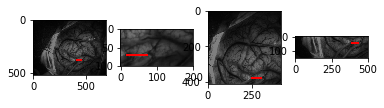

shape: (520, 692) [0, 0, 692, 520]
shape: (100, 200) [0, 0, 200, 100]
shape: (412, 412) [0, 0, 412, 412]
shape: (150, 500) [0, 0, 500, 150]


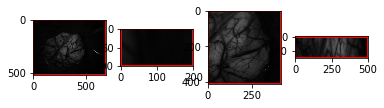

shape: (520, 692) [0, 0, 692, 520]
shape: (100, 200) [0, 0, 200, 100]
shape: (412, 412) [0, 0, 412, 412]
shape: (150, 500) [0, 0, 500, 150]


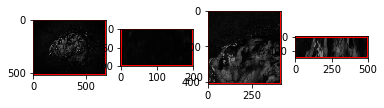

shape: (520, 692) [0, 0, 692, 520]
shape: (100, 200) [0, 0, 200, 100]
shape: (412, 412) [0, 0, 412, 412]
shape: (150, 500) [0, 0, 500, 150]


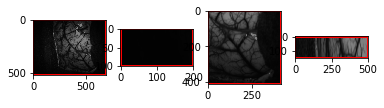

In [38]:
aug = [tr.RandomCrop((100,200)), tr.RandomCrop(412), tr.RandomCrop((150,500))]
plot_aug_ratio(org_images, get_boxes(), aug)

## RandomBrigthness

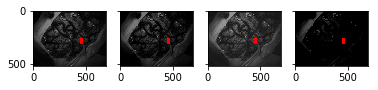

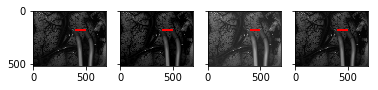

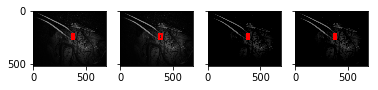

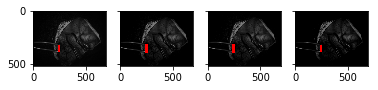

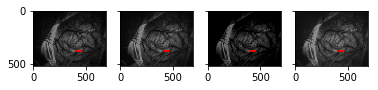

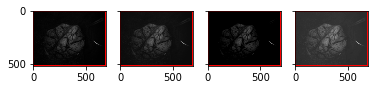

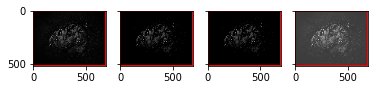

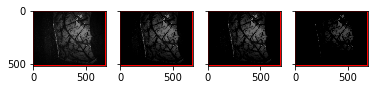

In [56]:
aug = [tr.RandomBrightness(500), tr.RandomBrightness(1000), tr.RandomBrightness(2000)]
plot_aug(org_images, get_boxes(), aug)

## RandomContrast

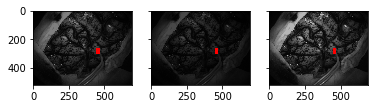

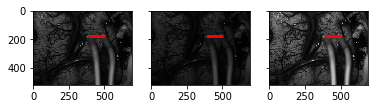

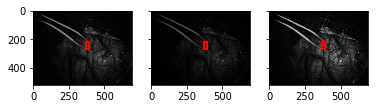

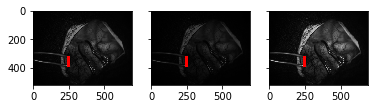

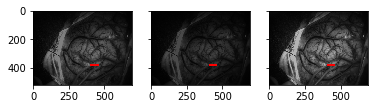

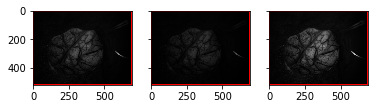

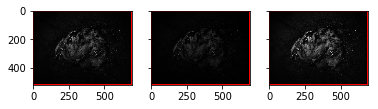

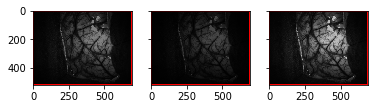

In [59]:
aug = [tr.RandomContrast(0.5,0.6), tr.RandomContrast(1.4,1.5)]
plot_aug(org_images, get_boxes(), aug)

## Resize + RandomCrop

shape: (520, 692) [452, 266, 461, 299]
shape: (300, 300) [167, 153, 172, 172]


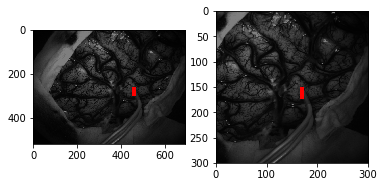

shape: (520, 692) [397, 175, 500, 183]
shape: (300, 300) [182, 101, 241, 106]


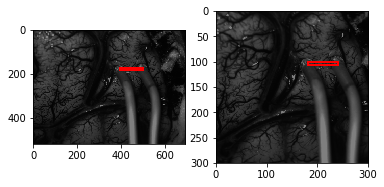

shape: (520, 692) [369, 217, 393, 266]
shape: (300, 300) [131, 125, 145, 153]


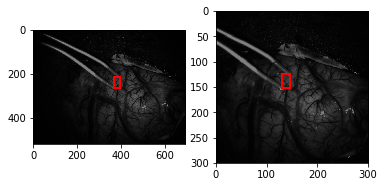

shape: (520, 692) [244, 323, 250, 386]
shape: (300, 300) [77, 186, 80, 223]


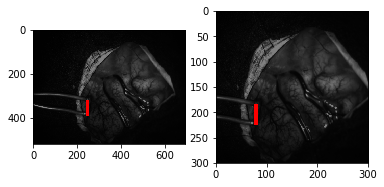

shape: (520, 692) [403, 381, 462, 382]
shape: (300, 300) [138, 220, 172, 220]


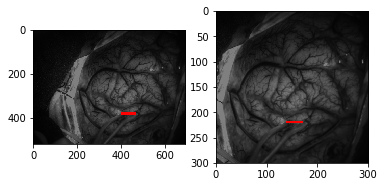

shape: (520, 692) [0, 0, 692, 520]
shape: (300, 300) [0, 0, 300, 300]


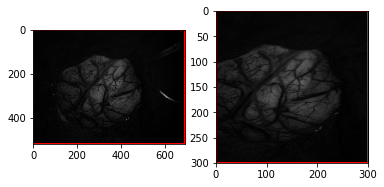

shape: (520, 692) [0, 0, 692, 520]
shape: (300, 300) [0, 0, 300, 300]


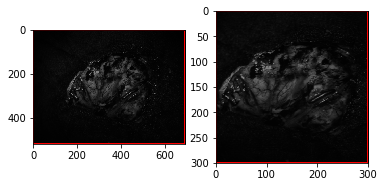

shape: (520, 692) [0, 0, 692, 520]
shape: (300, 300) [0, 0, 300, 300]


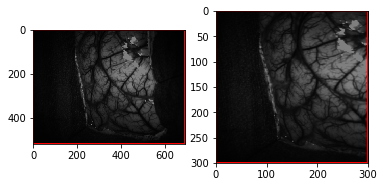

In [61]:
aug = [tr.Compose([tr.Resize(300), tr.RandomCrop(300)])]
plot_aug_ratio(org_images, get_boxes(), aug)

## RandomRotate

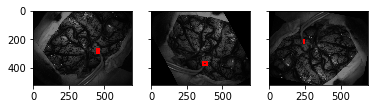

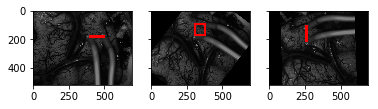

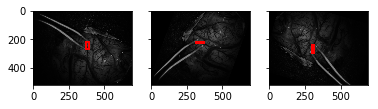

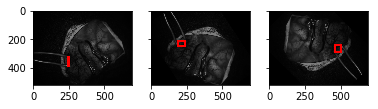

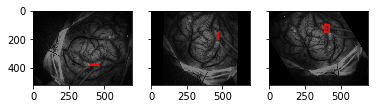

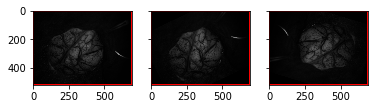

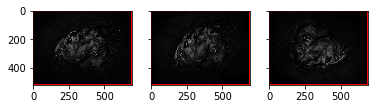

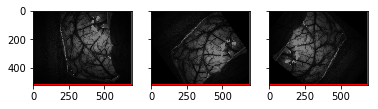

In [69]:
aug = [tr.RandomRotate((-90,90)), tr.RandomRotate((90,180))]
plot_aug(org_images, get_boxes(), aug)

## TrainAugmentations for SSD

Test without the conversion to pythorch tensor and percent coordinates of the bounding box

In [48]:
import ssd.transforms.preprocessing as pr

shape: (520, 692) [452, 266, 461, 299]
shape: (300, 300) [190, 153, 195, 172]
shape: (300, 300) [246, 16, 251, 35]


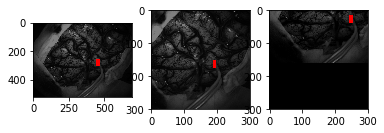

shape: (520, 692) [397, 175, 500, 183]
shape: (300, 300) [142, 101, 201, 106]
shape: (300, 300) [106, 129, 102, 69]


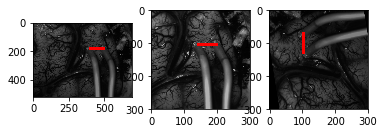

shape: (520, 692) [369, 217, 393, 266]
shape: (300, 300) [170, 22, 156, -6]
shape: (300, 300) [259, 172, 273, 201]


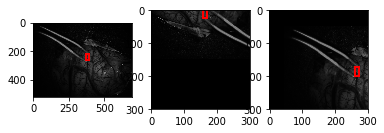

shape: (520, 692) [244, 323, 250, 386]
shape: (300, 300) [134, 184, 137, 220]
shape: (300, 300) [111, 186, 114, 223]


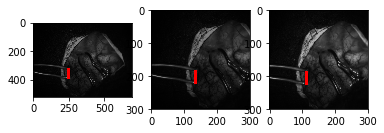

shape: (520, 692) [403, 381, 462, 382]
shape: (300, 300) [232, 80, 266, 79]
shape: (300, 300) [221, 220, 255, 220]


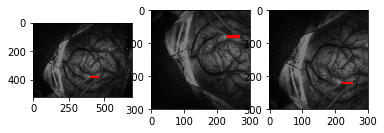

shape: (520, 692) [0, 0, 692, 520]
shape: (300, 300) [0, 0, 300, 300]
shape: (300, 300) [0, 0, 300, 300]


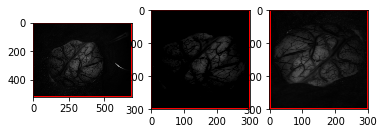

shape: (520, 692) [0, 0, 692, 520]
shape: (300, 300) [0, 0, 300, 300]
shape: (300, 300) [0, 0, 300, 300]


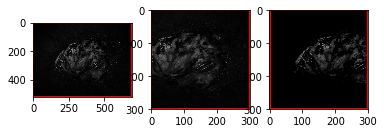

shape: (520, 692) [0, 0, 692, 520]
shape: (300, 300) [0, 0, 300, 300]
shape: (300, 300) [0, 0, 300, 300]


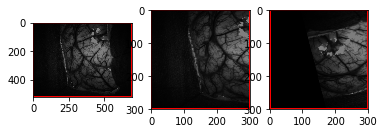

In [77]:
aug = [pr.TrainAugmentation(size=300, p=0.7), pr.TrainAugmentation(size=300, p=0.7)]
plot_aug_ratio(org_images, get_boxes(), aug)